## End-to-End Analysis of Amazon Sales Data

### Project Objective

- Enhance customer experience by analyzing sales data to identify trends and improve service.
- Drive revenue growth through data-driven insights that optimize sales performance and product offerings.

### Data Description

- User_ID: Unique identifier for each customer.
- Cust_name: Customer’s name.
- Product_ID: Unique identifier for each product purchased.
- Gender: Gender of the customer (M for Male, F for Female).
- Age Group: Age range of the customer in categorical form (e.g., 26-35).
- Age: Exact age of the customer.
- Marital_Status: Marital status of the customer (1 for Married, 0 for Unmarried).
- State: The state where the customer resides.
- Zone: The geographical zone of the customer’s state (e.g., Central, Southern).
- Occupation: Occupation of the customer, which may give insights into purchasing preferences by profession.
- Product_Category: Category of the product purchased (e.g., Food, Games & Toys, Footwear & Shoes).
- Orders: Number of units of the product ordered in the transaction.
- Amount: Total amount spent on the product for this transaction, in the local currency.
- Status: Status of the transaction. This column does not contain any data.
- unnamed1: This column does not contain any data.

In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing the Data
df=pd.read_csv('Data/Amazon Sales Data.csv',encoding='unicode-escape') 

# To avoid Encoding Error, We have used "Unicode Escape"
# We get this error when we are fetching the source data from different folder as 
# Python Program does not find the file in the current folder
# We can Enter the file path to avoid the Error---Important

### General Analysis of the Data

In [3]:
#Checking 5 Random Samples from DataFrame
df.sample(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
10282,1000392,Cooley,P00110942,F,18-25,21,0,Karnataka,Southern,IT Sector,Household items,3,3062.0,NaN,NaN
2296,1005029,Marc,P00003442,F,26-35,32,0,Madhya Pradesh,Central,Agriculture,Food,2,15283.0,NaN,NaN
4986,1001425,Sudevi,P00058442,F,0-17,14,0,Karnataka,Southern,Construction,Clothing & Apparel,1,8743.0,NaN,NaN
8567,1004022,Seth,P00193042,F,36-45,43,1,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,1,5388.0,NaN,NaN
9724,1005039,Lampkin,P00325242,M,36-45,44,0,Gujarat,Western,IT Sector,Household items,3,3779.0,NaN,NaN


In [4]:
print("Total Number of Rows :",df.shape[0])
print("Total Number of Columns :",df.shape[1])

Total Number of Rows : 11251
Total Number of Columns : 15


In [5]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
#Checking if Missing/Null values are there
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [8]:
#Checking the count of different data typed data
df.dtypes.value_counts()

object     8
int64      4
float64    3
dtype: int64

In [9]:
#Accessing different Dtyped Data

df_object=df.select_dtypes(include='object')
df_object.head()

,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
0,Sanskriti,P00125942,F,26-35,Maharashtra,Western,Healthcare,Auto
1,Kartik,P00110942,F,26-35,Andhra Pradesh,Southern,Govt,Auto
2,Bindu,P00118542,F,26-35,Uttar Pradesh,Central,Automobile,Auto
3,Sudevi,P00237842,M,0-17,Karnataka,Southern,Construction,Auto
4,Joni,P00057942,M,26-35,Gujarat,Western,Food Processing,Auto


In [10]:
df_int=df.select_dtypes(include='int64')
df_int.head()

,User_ID,Age,Marital_Status,Orders
0,1002903,28,0,1
1,1000732,35,1,3
2,1001990,35,1,3
3,1001425,16,0,2
4,1000588,28,1,2


In [11]:
df_float=df.select_dtypes(include="float64")
df_float.head()

,Amount,Status,unnamed1
0,23952.0,NaN,NaN
1,23934.0,NaN,NaN
2,23924.0,NaN,NaN
3,23912.0,NaN,NaN
4,23877.0,NaN,NaN


In [12]:
#Accessing different Dtyped Data Headers/Columns

df_object_col=df.select_dtypes(include='object').columns
df_int_col=df.select_dtypes(include='int64').columns
df_float_col=df.select_dtypes(include='float64').columns

In [13]:
#Checking the stats of the DataFrame object
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [14]:
#Using Describe Method for the useful Features only
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

### Feature Engineering

In [16]:
#Dropping Unwanted Columns
df.drop(['Status', 'unnamed1'],axis=1,inplace=True)

In [17]:
#Handling Null Values
df.dropna(inplace=True)

In [18]:
#Changing Data Type
df['Amount']=df['Amount'].astype('int64')

In [19]:
#Renaming the Column
df.rename(columns={'Zone':'Region','Marital_Status':'Is_Married'}).sample(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Is_Married,State,Region,Occupation,Product_Category,Orders,Amount
465,1003655,Asish,P00255842,M,26-35,32,0,Uttar Pradesh,Central,Banking,Food,1,19671
1364,1003022,Rozendal,P00205942,F,26-35,29,0,Karnataka,Southern,Healthcare,Footwear & Shoes,2,16422


In [20]:
#Fixing the State Name:
df.replace({'Andhra\xa0Pradesh':'Andhra Pradesh'},inplace=True)

In [21]:
#Fixing the Marital_Status Column:
df['Marital_Status'].replace({0:'Unmarried',1:'Married'},inplace=True)

### EDA: Data Visualization

### 1. Gender-wise Analysis

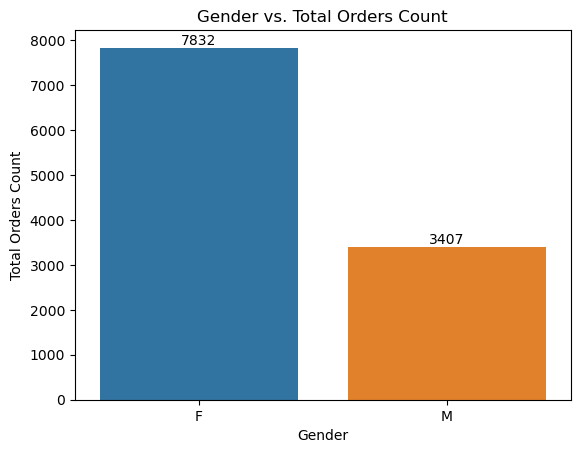

In [22]:
#Total Count of Orders per Gender

ax=sns.countplot(data=df,x='Gender')

for bars in ax.containers:
    ax.bar_label(bars)
    
#Adding xlabel,ylabel and title:
plt.xlabel('Gender')
plt.ylabel('Total Orders Count')
plt.title('Gender vs. Total Orders Count')
    
plt.show()

In [23]:
#Total Amount of Purchase/Shopping per Gender

df.groupby(by='Gender',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=True)

,Gender,Amount
1,M,31913276
0,F,74335853


In [24]:
#Gender-Amount-Data Frame Created
gen_amnt_plot=df.groupby(by='Gender',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=True)

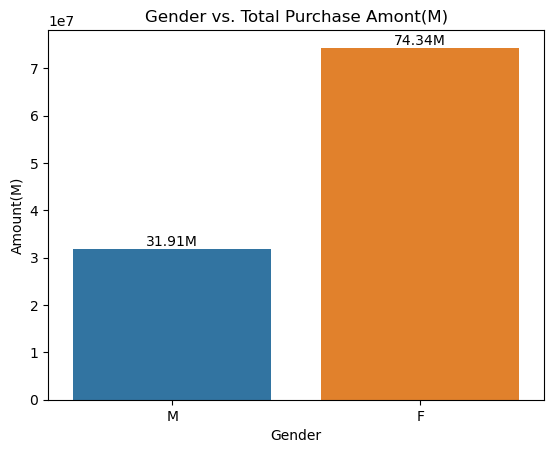

In [25]:
# Plotting the Graph: Gender vs. Amount
ax = sns.barplot(x='Gender', y='Amount', data=gen_amnt_plot)

# Adding labels to each bar in millions
for container in ax.containers:
    # Using bar_label with custom formatting to show values in millions
    ax.bar_label(container, labels=[f'{val / 1_000_000:.2f}M' for val in container.datavalues])
    

#Adding xlabel,ylabel and title:
plt.xlabel('Gender')
plt.ylabel('Amount(M)')
plt.title('Gender vs. Total Purchase Amont(M)')

# Show the plot
plt.show()

> **Finding 1: The plots above show that the majority of buyers are female, and females have spent the highest total amount on shopping.**

### Age-wise Analysis

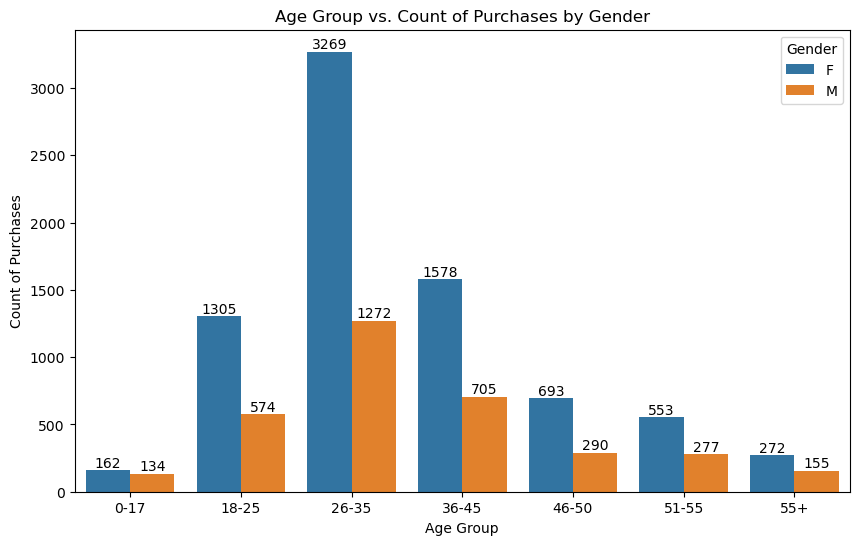

In [26]:
#Age-Group vs. Count of Purchase

#Adjusting the Plot Size
plt.figure(figsize=(10,6))

#Shorting the Age Group in Ascending Order:
sorted_age_group=sorted(df['Age Group'].unique())

ax=sns.countplot(data=df, x='Age Group',hue='Gender',order=sorted_age_group)

for container in ax.containers:
    ax.bar_label(container)
    
#Adding xlabel,ylabel and title:
plt.xlabel('Age Group')
plt.ylabel('Count of Purchases')
plt.title('Age Group vs. Count of Purchases by Gender') 

plt.show()

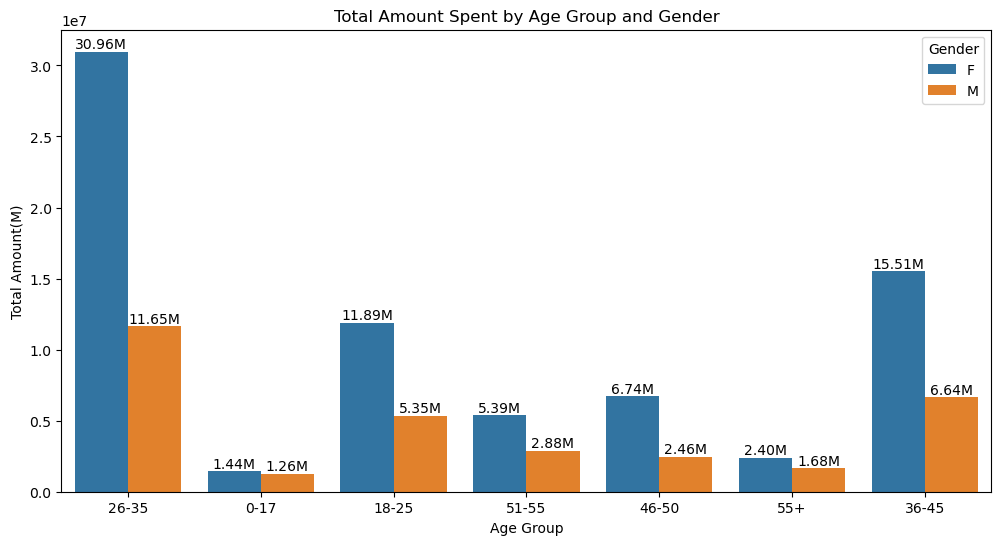

In [27]:
#Adjusting the Plot Size
plt.figure(figsize=(12,6))


#Age-Group vs. Purchase Amount
ax=sns.barplot(data=df,x='Age Group',y='Amount',hue='Gender',estimator=sum,orient='v',errorbar=None)

for container in ax.containers:
    ax.bar_label(container, labels=[f'{val / 1_000_000:.2f}M' for val in container.datavalues])
    
#Adding xlabel,ylabel and title:
plt.xlabel('Age Group')
plt.ylabel('Total Amount(M)')
plt.title('Total Amount Spent by Age Group and Gender')

plt.show()

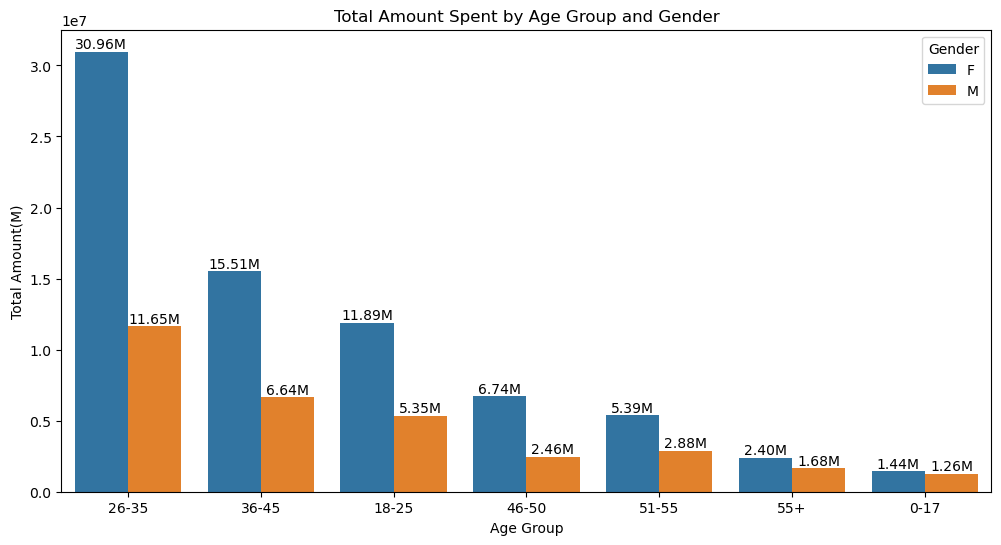

In [28]:
#Alternative:

#Creating new DataFrame Object
new_df=df.groupby(by=['Age Group','Gender'],as_index=False)['Amount'].sum().sort_values(by="Amount",ascending=False)

#Adjusting the Plot Size
plt.figure(figsize=(12,6)) 

ax=sns.barplot(x='Age Group',y='Amount',data=new_df,errorbar=None,hue='Gender')

for container in ax.containers:
    ax.bar_label(container, labels=[f'{val/1_000_000:.2f}M' for val in container.datavalues])
    
#Adding xlabel,ylabel and title:
plt.xlabel('Age Group')
plt.ylabel('Total Amount(M)')
plt.title('Total Amount Spent by Age Group and Gender')

plt.show()

> Finding 2: From the plot above, we can observe that females in the 26-35 age group have made the most purchases, and this group has also spent the highest amount during shopping.

### State-Wise Analysis

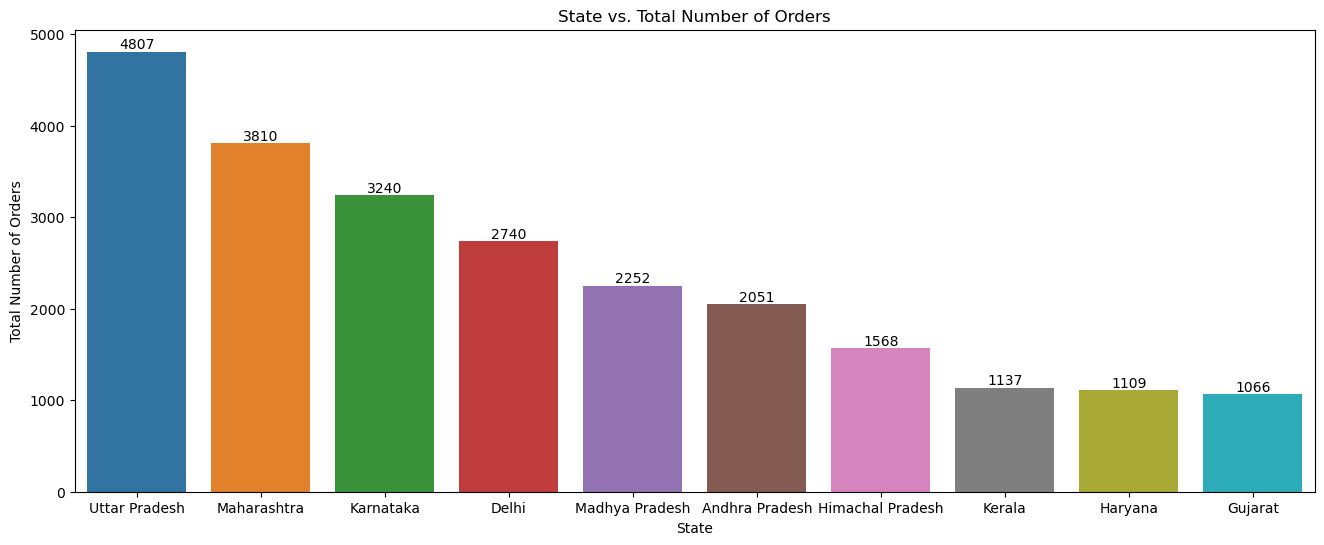

In [29]:
#Top 10 States per Order Quantity

state_orders=df.groupby(by='State',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

#Adjusting the Plot Size:
plt.figure(figsize=(16,6))

ax=sns.barplot(data=state_orders,x='State',y='Orders')

#Adding Data Labels
for container in ax.containers:
    ax.bar_label(container)
    
#Adding xlabel,ylabel and title:
plt.xlabel('State')
plt.ylabel('Total Number of Orders')
plt.title('State vs. Total Number of Orders')

plt.show()

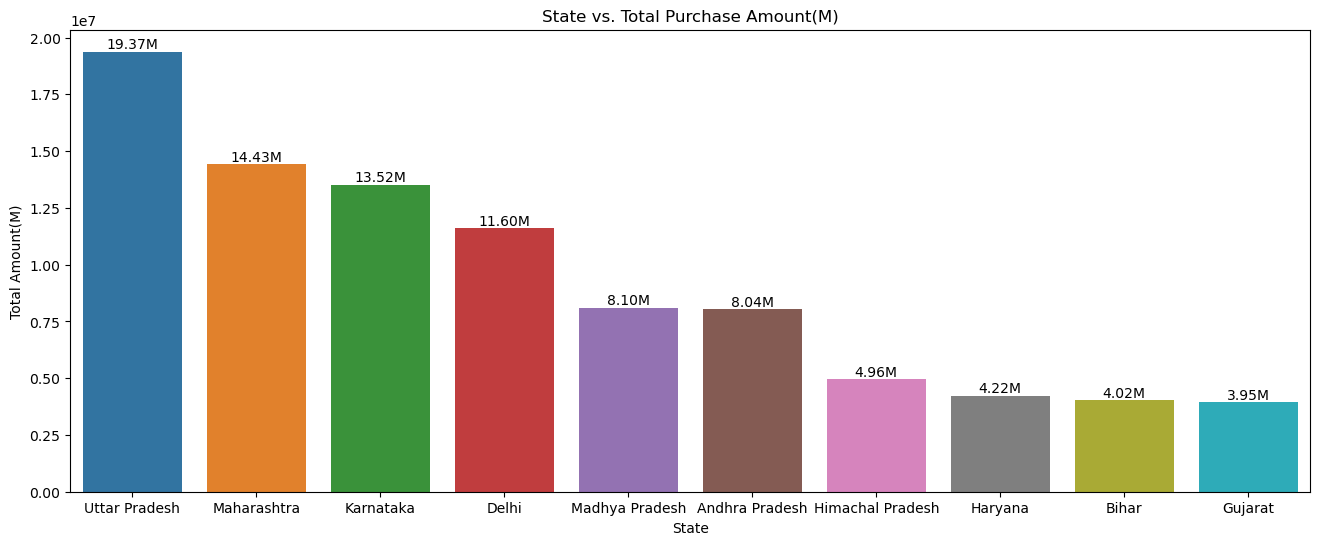

In [30]:
#Top 10 States per Order Amount

state_orders_amount=df.groupby(by='State',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

#Adjusting the Plot Size:
plt.figure(figsize=(16,6))

ax=sns.barplot(data=state_orders_amount,x='State',y='Amount')

#Adding Data Labels
for container in ax.containers:
    ax.bar_label(container, labels=[f'{val/1_000_000:.2f}M' for val in container.datavalues])
    
#Adding xlabel,ylabel and title:
plt.xlabel('State')
plt.ylabel('Total Amount(M)')
plt.title('State vs. Total Purchase Amount(M)')

plt.show()

> Finding 3: According to the plot above, Uttar Pradesh is the state with the highest number of orders and also the highest total order amount followed by Maharashtra and Karnataka.

### Marital_Status-Wise Analysis

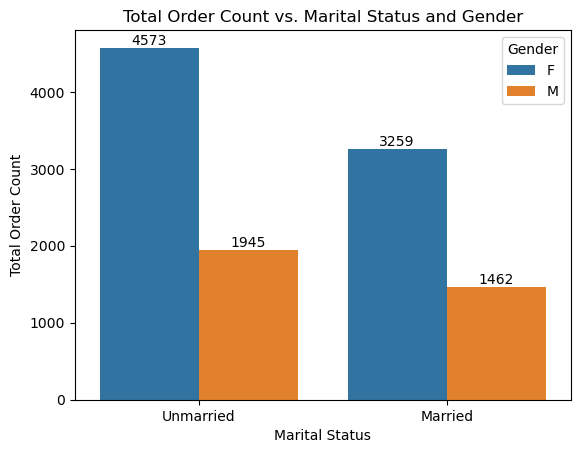

In [31]:
#Count of Orders per Marital_Status and Gender
ax=sns.countplot(data=df,x='Marital_Status',hue='Gender')

#Adding Data Labels:
for container in ax.containers:
    ax.bar_label(container)
    

#Adding xlabel,ylabel and title:
plt.xlabel('Marital Status')
plt.ylabel('Total Order Count')
plt.title('Total Order Count vs. Marital Status and Gender')

plt.show()

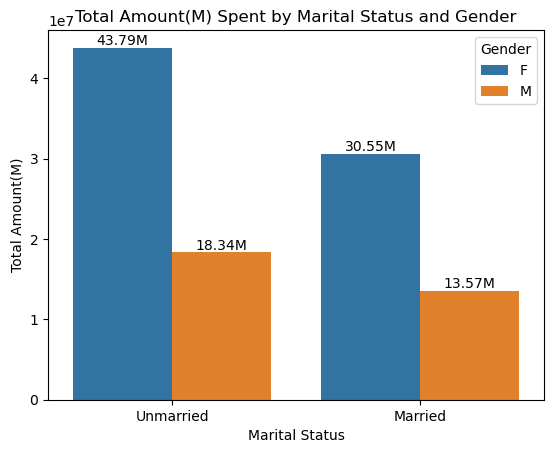

In [32]:
#Total Order Amount per Marital_Status and Gender
ax=sns.barplot(data=df,x='Marital_Status',y='Amount',errorbar=None,estimator=sum,hue='Gender')

#Adding Data Lables:
for container in ax.containers:
    ax.bar_label(container,labels=[f'{val/1_000_000:.2f}M' for val in container.datavalues])
    
#Adding xlabel,ylabel and title:
plt.xlabel('Marital Status')
plt.ylabel('Total Amount(M)')
plt.title('Total Amount(M) Spent by Marital Status and Gender')

plt.show()

> **Finding 4: According to the plot above, unmarried females are placing the most orders and spending the highest amount on shopping.**

### Occupation-wise Analysis:

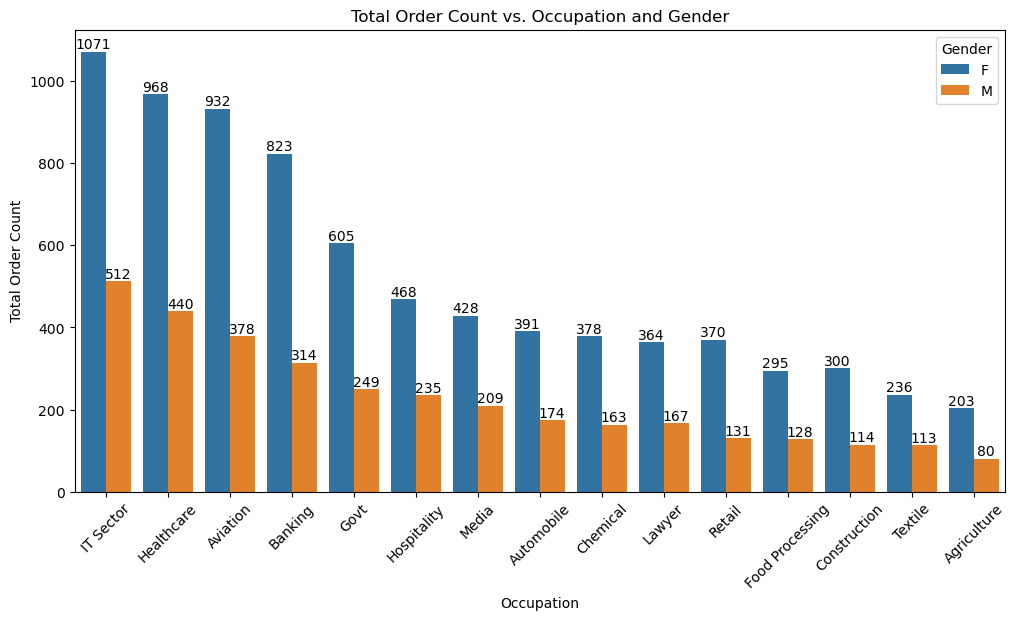

In [33]:
##Count of Orders per Occupation and Gender
df_occupation=df.groupby(by='Occupation',as_index=False)['Orders'].count().sort_values(by='Orders',ascending=False)

#Adjusting the Figure Size:
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df,x='Occupation',hue='Gender',order=df_occupation['Occupation'])

#Adding Data Labels:
for container in ax.containers:
    ax.bar_label(container)

#Rotate x-axis labels by 45 degree
plt.xticks(rotation=45)

#Adding xlabel,ylabel and title:
plt.xlabel('Occupation')
plt.ylabel('Total Order Count')
plt.title('Total Order Count vs. Occupation and Gender')

#Displaing the Plot Only
plt.show()

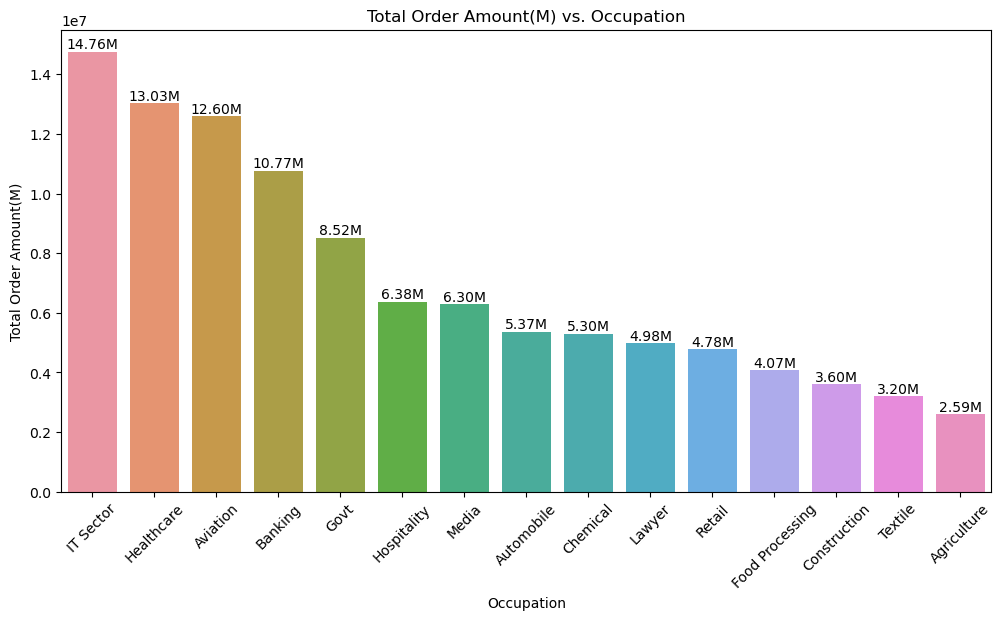

In [34]:
#Adjusting the Figure Size:
plt.figure(figsize=(12,6))

ax=sns.barplot(data=df,x='Occupation',y='Amount',estimator=sum,errorbar=None,order=df_occupation['Occupation'])

#Adding Data Lables:
for container in ax.containers:
    ax.bar_label(container, labels=[f'{val/1_000_000:.2f}M' for val in container.datavalues])

#Rotate x-axis labels by 45 degree
plt.xticks(rotation=45)

#Adding xlabel,ylabel and title:
plt.xlabel('Occupation')
plt.ylabel('Total Order Amount(M)')
plt.title('Total Order Amount(M) vs. Occupation')

#Displaing the Plot Only
plt.show()

> **Finding 5: From the plots above, we observe that females in the IT sector are placing the most orders, with the highest total order amount. Conversely, people in the agriculture sector are placing the fewest orders, with the lowest total amount spent.**

### Product Category-wise Analysis

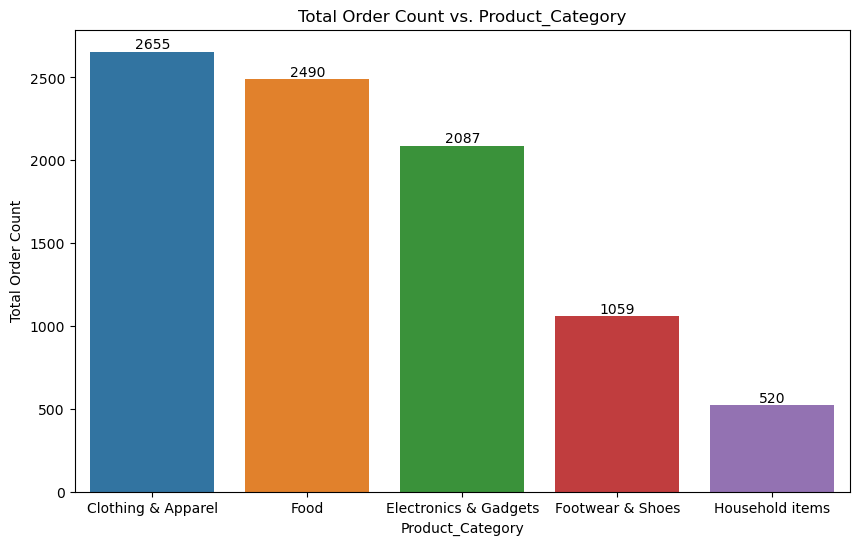

In [35]:
###Count of Orders per Product_Category

df_prod_cat_count=df.groupby(by="Product_Category",as_index=False)['Orders'].count().sort_values(by="Orders",ascending=False).head(5)

#Adjusting the Figure Size:
plt.figure(figsize=(10,6))

ax=sns.barplot(data=df_prod_cat_count,x="Product_Category",y="Orders")

for container in ax.containers:
    ax.bar_label(container)
    
#Adding xlabel,ylabel and title:
plt.xlabel('Product_Category')
plt.ylabel('Total Order Count')
plt.title('Total Order Count vs. Product_Category')

#Displaing the Plot Only
plt.show()

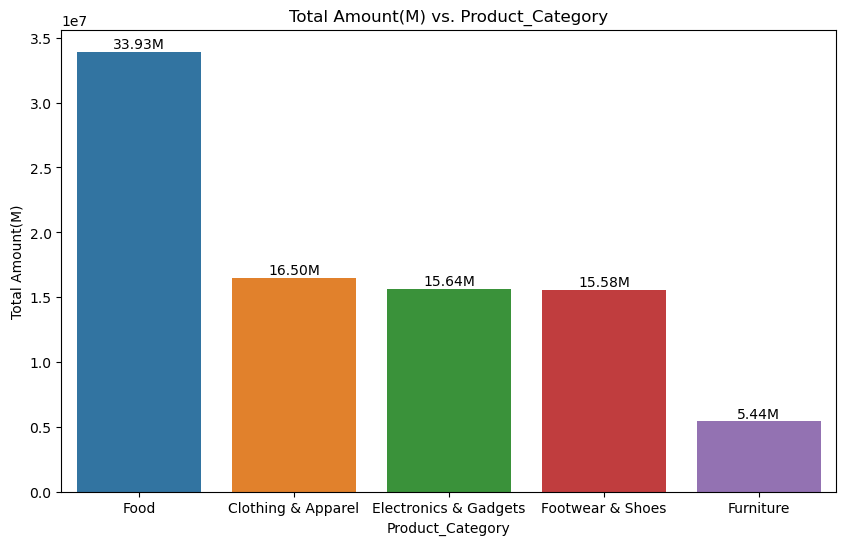

In [36]:
### Total Order Amount per Product Category

#Creating New Data Frame
df_food_amnt=df.groupby(by='Product_Category',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)

#Adjusting the shape of the plot
plt.figure(figsize=(10,6))

#Creating new plot object
ax=sns.barplot(data=df_food_amnt,x='Product_Category',y='Amount')

#Adding Data Labels
for container in ax.containers:
    ax.bar_label(container,labels=[f'{val/1_000_000:.2f}M' for val in container.datavalues])

#Adding xlabel,ylabel and title:
plt.xlabel('Product_Category')
plt.ylabel('Total Amount(M)')
plt.title('Total Amount(M) vs. Product_Category')

#Displaing the Plot Only
plt.show()

> Finding 6: From the two plots above, we can see that people have primarily ordered items in the Clothing & Apparel category, followed by Food products and Electronics & Gadgets. However, the highest spending has been on Food items.

### Conclusion:

> The analysis reveals that females, particularly those aged 26-35 and working in the IT sector, are the primary consumers, contributing the highest in terms of both purchase volume and spending. Unmarried females show a significant purchasing pattern, with the majority of their spending focused on categories like Food and Clothing & Apparel. Geographically, Uttar Pradesh leads in both order volume and spending, with Maharashtra and Karnataka following. While most orders fall within the Clothing & Apparel category, the largest share of spending is on Food products, indicating a preference for essentials and consumables among high-spending customers.